# Key papers

This Jupyter Notebook can be used to perform basic publication analysis for a science branch. 

**Features:**

1. Subtopic analysis based on co-citation graph clustering:
    * Chord diagram for co-citation graph
    * Comparison of subtopics by size
    * Timeline of each subtopic
    * Extraction of 1,2,3-grams describing each subtopic
2. Detection of highlight papers:
    * Top cited papers overall
    * Detection of most cited papers for each year
    * Detection of papers with max relative citation gain for each year
3. Citation dynamics visualization for highlight papers
4. Subtopic evolution tracking based on co-citation graph clustering for different time periods

## Getting Started

1. Define the `SEARCH_TERMS` variable in the cell below with a list of keywords that describe the science branch of your interest.
2. Run all cells & see the results.

In [1]:
SEARCH_TERMS = ['dna', 'methylation', 'clock']

## Publication Analysis

In [2]:
import logging

from bokeh.plotting import show, output_notebook
from matplotlib import pyplot as plt

from keypaper.analysis import KeyPaperAnalyzer
from keypaper.visualization import Plotter

logging.basicConfig(level=logging.DEBUG, format='%(asctime)s %(levelname)s: %(message)s')
output_notebook()
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/Nikolay.Kapralov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/Nikolay.Kapralov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/Nikolay.Kapralov/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/Nikolay.Kapralov/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Loading BokehJS ...

2019-07-17 13:17:27,313 DEBUG: Loaded backend module://ipykernel.pylab.backend_inline version unknown.
2019-07-17 13:17:27,321 DEBUG: Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [3]:
analyzer = KeyPaperAnalyzer()
log = analyzer.launch(*SEARCH_TERMS)

2019-07-17 13:17:27,331 INFO: TODO: handle queries which return more than 10000 items
2019-07-17 13:17:28,350 INFO: Found 309 articles about ('dna', 'methylation', 'clock')
2019-07-17 13:17:28,351 INFO: Loading publication data
2019-07-17 13:17:28,352 INFO: Creating pmids table for request with index.
2019-07-17 13:17:28,395 INFO: Found 309 publications in the local database

2019-07-17 13:17:28,397 INFO: Started loading citation stats
2019-07-17 13:17:28,435 INFO: Done loading citation stats
2019-07-17 13:17:28,459 INFO: Loaded citation stats for 209 of 309 articles.
Others may either have zero citations or be absent in the local database.
2019-07-17 13:17:28,460 INFO: Filtering top 100000 or 80% of all the citations
2019-07-17 13:17:28,467 INFO: 167 articles to process.

2019-07-17 13:17:28,468 INFO: Calculating co-citations for selected articles
2019-07-17 13:17:28,497 INFO: Loaded 615 lines of citing info
2019-07-17 13:17:28,498 INFO: Found 8987 co-cited pairs of articles
2019-07-1

2019-07-17 13:17:31,161 INFO: Done

2019-07-17 13:17:31,162 INFO: Identifying top cited papers overall
2019-07-17 13:17:31,163 INFO: Identifying papers with max citation gain for each year
2019-07-17 13:17:31,195 INFO: Identifying papers with max relative citation gain for each year



In [4]:
plotter = Plotter(analyzer)

## Subtopics a.k.a. Clusters in the Co-citation Graph

In [5]:
# show(plotter.chord_diagram_components())

In [6]:
show(plotter.component_size_summary())

2019-07-17 13:17:31,308 INFO: Summary component detailed info visualization


In [7]:
for p in plotter.subtopic_timeline_graphs():
    show(p)

2019-07-17 13:17:31,472 INFO: Per component detailed info visualization


## Top Cited Papers Overall

In [8]:
show(plotter.top_cited_papers())

## Top Cited Papers for Each Year

In [9]:
show(plotter.max_gain_papers())

2019-07-17 13:17:32,084 INFO: Different colors encode different papers


## Top by Relative Gain for Each Year

In [10]:
show(plotter.max_relative_gain_papers())

2019-07-17 13:17:32,141 INFO: Top papers in relative gain for each year
2019-07-17 13:17:32,143 INFO: Relative gain (year) = Citation Gain (year) / Citations before year
2019-07-17 13:17:32,144 INFO: Different colors encode different papers


## Citation per Year Dynamics

In [11]:
plotter.article_citation_dynamics()

2019-07-17 13:17:32,199 INFO: Choose ID to get detailed citations timeline for top cited / max gain or relative gain papers


In [12]:
analyzer.df

pmid                                              title  \
0    14577056                                     Genes of aging   
1    15790588  Deregulated expression of the PER1, PER2 and P...   
2    15860628  PERIOD1-associated proteins modulate the negat...   
3    15941485  Stability of colon stem cell methylation after...   
4    15975143  Age-related human small intestine methylation:...   
5    16314580  Counting human somatic cell replications: meth...   
6    16582617  Counting divisions in a human somatic cell tre...   
7    16683245  Promoter methylation in circadian genes of end...   
8    16717091  The polycomb group protein EZH2 is required fo...   
9    16999817  Downregulation of circadian clock genes in chr...   
10   17029560  Heterogeneous genomic molecular clocks in prim...   
11    1722018                DNA methylation and cellular ageing   
12   17672908  Lack of increases in methylation at three CpG-...   
13   18358604  A pilot study for circadian gene disturbance i...   
14   18410448  Inferring relative numbers of human leucocyte ...   
15   18483325  DNA methylation in benign breast epithelium in...   
16   19031430  Inferring human stem cell behaviour from epige...   
17   19296127  Disturbance of circadian gene expression in br...   
18   19861541  Epigenetic inactivation of the circadian clock...   
19   20043880  Methylation analyses on promoters of mPer1, mP...   
20   20711251  Using DNA methylation patterns to infer tumor ...   
21   21139085  The Jumonji C domain-containing protein JMJ30 ...   
22   21317377  Rapid and reversible light-mediated chromatin ...   
23   21495873       Epigenetic priming of the metabolic syndrome   
24   21536041  Perfect timing: epigenetic regulation of the c...   
25   21596611  Methylation analysis of circadian clock gene p...   
26   21811413  CHD1 remodels chromatin and influences transie...   
27   22080730  Epigenetic impact of long-term shiftwork: pilo...   
28   22193177  Promoter methylation analysis of seven clock g...   
29   22348461  Folate depletion changes gene expression of fa...   
..        ...                                                ...   
117  28249716  Conserved effect of aging on DNA methylation a...   
118  28259012  DNA methylome analysis identifies accelerated ...   
119  28289477  Obesity accelerates epigenetic aging in middle...   
120  28289478  Cerebral white matter hyperintensities on MRI ...   
121  28303888  DNA methylation signatures in peripheral blood...   
122  28351383  Diverse interventions that extend mouse lifesp...   
123  28351423  Epigenetic aging signatures in mice livers are...   
124  28361883  Migration phenology and breeding success are p...   
125  28364215  DNA methylation age is elevated in breast tiss...   
126  28368004  Diurnal and seasonal molecular rhythms in huma...   
127  28373601      An epigenetic aging clock for dogs and wolves   
128  28377537    Accelerated epigenetic aging in Werner syndrome   
129  28380383  Using DNA Methylation Profiling to Evaluate Bi...   
130  28399939  Multi-tissue DNA methylation age predictor in ...   
131  28423572  Acceleration of leukocytes' epigenetic age as ...   
132  28470125  Aging, exceptional longevity and comparisons o...   
133  28503212  Associations between maternal risk factors of ...   
134  28691915  Forensic individual age estimation with DNA: F...   
135  28721811  Moving to the Rhythm with Clock (Circadian) Ge...   
136  28731985  Accelerated DNA Methylation Age: Associations ...   
137  28827677  Exposure to Violence Accelerates Epigenetic Ag...   
138  29081695                  Aging as an Epigenetic Phenomenon   
139  29197076  DNA methylation-based biological aging and can...   
140  29235933  Faster ticking rate of the epigenetic clock is...   
141  29271864  Accelerated DNA Methylation Age: Associations ...   
142  29374233  GWAS of epigenetic aging rates in blood reveal...   
143  29610480  DNA methylation loss in late-replicating domai... 

# Experimental Features

## Component Evolution

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
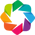

In [13]:
import math
import holoviews as hv
hv.extension('bokeh')

import pandas as pd

In [14]:
# Tuning parameters

MIN_PAPERS = 10   # Stop analysis if total number of papers is less than MIN_PAPERS
MIN_CHANGE_VALUE = 5   # Do not display links between clusters that contain less than MIN_CHANGE_VALUE

In [15]:
analyzer.subtopic_evolution_analysis(step=2, min_papers=MIN_PAPERS)
evol = plotter.analyzer.evolution_df.copy()
for col in evol:
    evol[col] = evol[col].apply(lambda x: math.floor(x))

2019-07-17 13:17:33,170 INFO: Studying evolution of subtopic clusters in 2006 - 2019 with step of 2 years
2019-07-17 13:17:33,265 INFO: 2019: graph contains 170 nodes, 2042 edges
2019-07-17 13:17:33,408 INFO: Merging components smaller than 0.05 to "Other" component
2019-07-17 13:17:33,408 INFO: Reassigning components
2019-07-17 13:17:33,409 INFO: Processed 5 components
2019-07-17 13:17:33,444 INFO: 2017: graph contains 131 nodes, 1007 edges
2019-07-17 13:17:33,608 INFO: Merging components smaller than 0.05 to "Other" component
2019-07-17 13:17:33,611 INFO: All components are bigger than 0.05, no need to reassign
2019-07-17 13:17:33,651 INFO: 2015: graph contains 71 nodes, 338 edges
2019-07-17 13:17:33,692 INFO: Merging components smaller than 0.05 to "Other" component
2019-07-17 13:17:33,693 INFO: All components are bigger than 0.05, no need to reassign
2019-07-17 13:17:33,716 INFO: 2013: graph contains 36 nodes, 69 edges
2019-07-17 13:17:33,737 INFO: Merging components smaller than 0

In [16]:
cols = evol.columns[1:]
pairs = list(zip(cols, cols[1:]))
edges = []
mapping = []

for now, then in pairs:
    nodes_now = [f'{now} {c}' for c in evol[now].unique() if c >= 0]
    nodes_then = [f'{then} {c}' for c in evol[then].unique() if c >= 0]
   
    inner = {node : 0 for node in nodes_then}
    changes = {node : inner.copy() for node in nodes_now}
    for pmid, comp in evol.iterrows():
        c_now, c_then = comp[now], comp[then]
        if c_now != -1 and c_then != -1:
            changes[f'{now} {c_now}'][f'{then} {c_then}'] += 1
            
    for v in nodes_now:
        for u in nodes_then:
            if changes[v][u] > MIN_CHANGE_VALUE:
                edges.append((v, u, changes[v][u]))

In [17]:
from holoviews import dim

value_dim = hv.Dimension('Amount', unit=None)
topic_evolution = hv.Sankey(edges, ['From', 'To'], vdims=value_dim)
topic_evolution.opts(width=960, height=400, show_values=False, cmap='Category20',
                     edge_color=dim('To').str(), node_color=dim('label').str())

:Sankey   [From,To]   (Amount)

## PageRank for Citation Analysis

In [18]:
analyzer.search(*SEARCH_TERMS) # Re-launch search to restore eliminated PMIDs
analyzer.load_citations()

2019-07-17 13:17:34,181 INFO: TODO: handle queries which return more than 10000 items
2019-07-17 13:17:34,903 INFO: Found 309 articles about ('dna', 'methylation', 'clock')
2019-07-17 13:17:34,904 INFO: Started loading raw information about citations
2019-07-17 13:17:34,917 INFO: Done loading citations, building citation graph
2019-07-17 13:17:34,920 INFO: Built citation graph - nodes 184 edges 919


In [19]:
import networkx as nx

# Apply PageRank algorithm with damping factor of 0.5
pr_nx = nx.pagerank(analyzer.G, alpha=0.5, tol=1e-9)

In [20]:
ancestor = dict.fromkeys(analyzer.G, (0, 0))

# Select ancestor with highest PR for each node
for v in analyzer.G:
    for u in analyzer.G[v]:
        anc, pr = ancestor[u]
        if pr_nx[v] > pr:
            ancestor[u] = (v, pr_nx[v])

In [21]:
PRG = nx.DiGraph()
for v, anc in ancestor.items():
    u, pr = anc
    if pr > 0:
        PRG.add_edge(u, v)

In [22]:
start, end = zip(*list(PRG.edges()))

In [38]:
from bokeh.plotting import figure
from bokeh.models import GraphRenderer, StaticLayoutProvider, Circle, HoverTool, MultiLine
from bokeh.models.graphs import NodesAndLinkedEdges

node_indices = list(filter(lambda node: len(analyzer.df[analyzer.df['pmid'] == node]) > 0, list(PRG.nodes())))

years = []
year_counts = {}
titles = []
pageranks = []
size = []
for node in node_indices:
    sel = analyzer.df[analyzer.df['pmid'] == node]
    year = sel['year'].values[0]
    
    if not year in year_counts:
        year_counts[year] = 1
    else:
        year_counts[year] += 1
    years.append(year)
    
    titles.append(sel['title'].values[0])
    pageranks.append(pr_nx[node] * 100)
    size.append(pr_nx[node] * 1000)
max_year_count = max(list(year_counts.values()))
min_year, max_year = min(years), max(years)

plot = figure(title="PageRank applied to citation filtering", 
              x_range=(min_year - 1, max_year+1), y_range=(0, max_year_count + 1),
              tools="", toolbar_location=None)

TOOLTIPS = """
    <div style="max-width: 320px">
        <div>
            <span style="font-size: 12px; font-weight: bold;">@title</span>
        </div>
        <div>
            <span style="font-size: 11px;">Year</span>
            <span style="font-size: 10px;">@year</span>
        </div>
        <div>
            <span style="font-size: 11px;">PMID</span>
            <span style="font-size: 10px;">@pmid</span>
        </div>
        <div>
            <span style="font-size: 11px;">PageRank</span>
            <span style="font-size: 10px;">@pagerank</span>
        </div>
    </div>
"""

plot.add_tools(HoverTool(tooltips=TOOLTIPS))

graph = GraphRenderer()

graph.node_renderer.data_source.add(node_indices, 'index')
graph.node_renderer.data_source.data['pmid'] = node_indices
graph.node_renderer.data_source.data['year'] = years
graph.node_renderer.data_source.data['title'] = titles
graph.node_renderer.data_source.data['pagerank'] = pageranks
graph.node_renderer.data_source.data['size'] = size
# graph.edge_renderer.data_source.data = dict(start=start, end=end)

### start of layout code   
x = [analyzer.df[analyzer.df['pmid'] == pmid]['year'].values[0] for pmid in node_indices]
y = []
tmp_year_counts = {}
for node in node_indices:
    year = analyzer.df[analyzer.df['pmid'] == node]['year'].values[0]
    if not year in tmp_year_counts:
        tmp_year_counts[year] = 1
    else:
        tmp_year_counts[year] += 1
    y.append(tmp_year_counts[year])

graph_layout = dict(zip(node_indices, zip(x, y)))
graph.layout_provider = StaticLayoutProvider(graph_layout=graph_layout)

graph.node_renderer.glyph = Circle(size='size', fill_color='blue')
graph.node_renderer.hover_glyph = Circle(size='size', fill_color='green')

# graph.edge_renderer.glyph = MultiLine(line_color='black', line_alpha=1, line_width=1)
# graph.edge_renderer.hover_glyph = MultiLine(line_color='green', line_width=2)

graph.inspection_policy = NodesAndLinkedEdges()

plot.min_border_left = 75
plot.renderers.append(graph)

show(plot)

### Top Papers by PageRank

In [24]:
for pmid, pagerank in sorted(pr_nx.items(), key=lambda el: el[1], reverse=True)[:10]:
    print(f'{(100*pagerank):.2f} {analyzer.df[analyzer.df["pmid"] == pmid]["title"].values[0]}')

8.15 DNA methylation age of human tissues and cell types
2.67 Obesity accelerates epigenetic aging of human liver
2.56 Counting human somatic cell replications: methylation mirrors endometrial stem cell divisions
2.47 Counting divisions in a human somatic cell tree: how, what and why?
2.33 The epigenetic clock is correlated with physical and cognitive fitness in the Lothian Birth Cohort 1936
1.76 Accelerated epigenetic aging in Down syndrome
1.29 HIV-1 Infection Accelerates Age According to the Epigenetic Clock
1.14 Circadian behavior is light-reprogrammed by plastic DNA methylation
1.10 PERIOD1-associated proteins modulate the negative limb of the mammalian circadian oscillator
1.00 The polycomb group protein EZH2 is required for mammalian circadian clock function


## Custom PageRank version for testing

This section is devoted to experiments with PageRank on the basis of networkx source code.

In [25]:
# Adopted from networkx source code
# https://networkx.github.io/documentation/networkx-1.10/_modules/networkx/algorithms/link_analysis/pagerank_alg.html#pagerank

import numpy as np
from networkx import NetworkXError

def pagerank(G, alpha=0.85, personalization=None,
             max_iter=100, tol=1.0e-6, nstart=None, weight='weight',
             dangling=None):
    """Return the PageRank of the nodes in the graph.

    PageRank computes a ranking of the nodes in the graph G based on
    the structure of the incoming links. It was originally designed as
    an algorithm to rank web pages.

    Parameters
    ----------
    G : graph
      A NetworkX graph.  Undirected graphs will be converted to a directed
      graph with two directed edges for each undirected edge.

    alpha : float, optional
      Damping parameter for PageRank, default=0.85.

    personalization: dict, optional
      The "personalization vector" consisting of a dictionary with a
      key for every graph node and nonzero personalization value for each node.
      By default, a uniform distribution is used.

    max_iter : integer, optional
      Maximum number of iterations in power method eigenvalue solver.

    tol : float, optional
      Error tolerance used to check convergence in power method solver.

    nstart : dictionary, optional
      Starting value of PageRank iteration for each node.

    weight : key, optional
      Edge data key to use as weight.  If None weights are set to 1.

    dangling: dict, optional
      The outedges to be assigned to any "dangling" nodes, i.e., nodes without
      any outedges. The dict key is the node the outedge points to and the dict
      value is the weight of that outedge. By default, dangling nodes are given
      outedges according to the personalization vector (uniform if not
      specified). This must be selected to result in an irreducible transition
      matrix (see notes under google_matrix). It may be common to have the
      dangling dict to be the same as the personalization dict.

    Returns
    -------
    pagerank : dictionary
       Dictionary of nodes with PageRank as value

    Examples
    --------
    >>> G = nx.DiGraph(nx.path_graph(4))
    >>> pr = nx.pagerank(G, alpha=0.9)

    Notes
    -----
    The eigenvector calculation is done by the power iteration method
    and has no guarantee of convergence.  The iteration will stop
    after max_iter iterations or an error tolerance of
    number_of_nodes(G)*tol has been reached.

    The PageRank algorithm was designed for directed graphs but this
    algorithm does not check if the input graph is directed and will
    execute on undirected graphs by converting each edge in the
    directed graph to two edges.

    See Also
    --------
    pagerank_numpy, pagerank_scipy, google_matrix

    References
    ----------
    .. [1] A. Langville and C. Meyer,
       "A survey of eigenvector methods of web information retrieval."
       http://citeseer.ist.psu.edu/713792.html
    .. [2] Page, Lawrence; Brin, Sergey; Motwani, Rajeev and Winograd, Terry,
       The PageRank citation ranking: Bringing order to the Web. 1999
       http://dbpubs.stanford.edu:8090/pub/showDoc.Fulltext?lang=en&doc=1999-66&format=pdf
    """
    if len(G) == 0:
        return {}

    if not G.is_directed():
        D = G.to_directed()
    else:
        D = G

    # Create a copy in (right) stochastic form
    W = nx.stochastic_graph(D, weight=weight)
    N = W.number_of_nodes()
    E = W.number_of_edges()
       
    # Number of references for each node and average for graph
    NR = D.out_degree(list(D.nodes()))
    NR_avg = E * 2 / N

    # Choose fixed starting vector if not given
    if nstart is None:
        x = dict.fromkeys(W, 1.0 / N)
    else:
        # Normalized nstart vector
        s = float(sum(nstart.values()))
        x = dict((k, v / s) for k, v in nstart.items())

    if personalization is None:
        # Assign uniform personalization vector if not given
        p = dict.fromkeys(W, 1.0 / N)
    else:
        missing = set(G) - set(personalization)
        if missing:
            raise NetworkXError('Personalization dictionary '
                                'must have a value for every node. '
                                'Missing nodes %s' % missing)
        s = float(sum(personalization.values()))
        p = dict((k, v / s) for k, v in personalization.items())

    if dangling is None:
        # Use personalization vector if dangling vector not specified
        dangling_weights = p
    else:
        missing = set(G) - set(dangling)
        if missing:
            raise NetworkXError('Dangling node dictionary '
                                'must have a value for every node. '
                                'Missing nodes %s' % missing)
        s = float(sum(dangling.values()))
        dangling_weights = dict((k, v/s) for k, v in dangling.items())
    dangling_nodes = [n for n in W if W.out_degree(n, weight=weight) == 0.0]
    
    # power iteration: make up to max_iter iterations
    n_iter = 0
    for _ in range(max_iter):
        n_iter += 1
        xlast = x
        x = dict.fromkeys(xlast.keys(), 0)
        danglesum = alpha * sum(xlast[n] for n in dangling_nodes)
        for n in x:
            # this matrix multiply looks odd because it is
            # doing a left multiply x^T=xlast^T*W
            for nbr in W[n]:
                x[nbr] += alpha * xlast[n] / (1 + np.sqrt(NR[n]))
            x[n] += danglesum * dangling_weights[n] + (1.0 - alpha) * p[n]
        # check convergence, l1 norm
        err = sum([abs(x[n] - xlast[n]) for n in x])
        if err < N*tol:
            print(f'PageRank converged in {n_iter} iterations.')
            return x

    raise NetworkXError('pagerank: power iteration failed to converge '
                        'in %d iterations.' % max_iter)

In [26]:
pr = pagerank(analyzer.G, alpha=0.5, tol=1e-12)

PageRank converged in 41 iterations.
